### 5647058_IM939_DataInformedEssay

# APPENDIX A

# Can money buy happiness? Comparing the predictive power between economic and non-economic factors on happiness levels

**Research question**: Do non-economic factors predict greater happiness compared to traditional economic factors?
- _Sub-question_: Does ‘social support’ predict a higher ‘life ladder’ (or happiness) score compared to ‘GDP per capita’?

**Predictor variables**: Log GDP per capita, Social support
- Economic vs Collective community

**Outcome variable**: Life Ladder (or Happiness) score

## Packages

In [1]:
### INSTALLING PACKAGES ###

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

## Importing Data

In [2]:
### IMPORTING DATA ###

df = pd.read_csv("WHR_data.csv")

df.shape

(2363, 11)

## Understanding the Dataset

In [3]:
### GENERAL VARIABLE INFORMATION ###

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


In [4]:
### INDIVIDUAL VARIABLE INFORMATION ###

unique_year = np.unique(df['year'])
num_unique_cnty = len(np.unique(df['Country name']))

# df.loc[df['Country name'].str.contains('Korea', case = False, na = False)]

print(f"Unique years: {unique_year}", f"Number of countries: {num_unique_cnty}", sep="\n")

Unique years: [2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019 2020 2021 2022 2023]
Number of countries: 165


In [5]:
### DESCRIPTIVE STATISTICS ###

df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2363.000000,2363.000000,2335.000000,2350.000000,2300.000000,2327.000000,2282.000000,2238.000000,2339.000000,2347.000000
mean,2014.763860,5.483566,9.399671,0.809369,63.401828,0.750282,0.000098,0.743971,0.651882,0.273151
std,5.059436,1.125522,1.152069,0.121212,6.842644,0.139357,0.161388,0.184865,0.106240,0.087131
min,2005.000000,1.281000,5.527000,0.228000,6.720000,0.228000,-0.340000,0.035000,0.179000,0.083000
25%,2011.000000,4.647000,8.506500,0.744000,59.195000,0.661000,-0.112000,0.687000,0.572000,0.209000
50%,2015.000000,5.449000,9.503000,0.834500,65.100000,0.771000,-0.022000,0.798500,0.663000,0.262000
75%,2019.000000,6.323500,10.392500,0.904000,68.552500,0.862000,0.093750,0.867750,0.737000,0.326000
max,2023.000000,8.019000,11.676000,0.987000,74.600000,0.985000,0.700000,0.983000,0.884000,0.705000


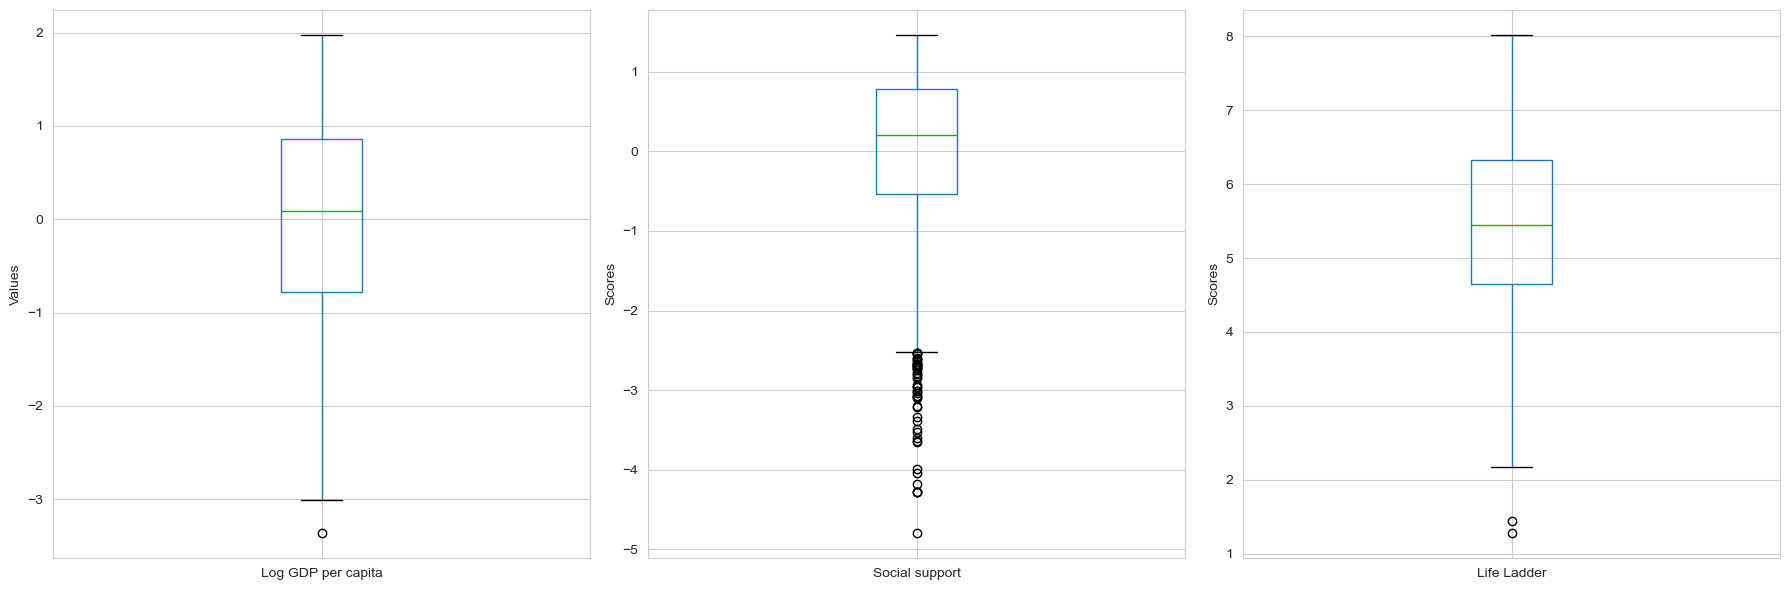

In [30]:
### BOXPLOT ###

df_gdp = df[['Log GDP per capita']]
df_ss = df[['Social support']]
df_ll = df[['Life Ladder']]

# Create subplots for one figure
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
## fig: The figure object, which contains the entire plot area
## ax: The axes object(s), where the actual plotting happens. If multiple subplots are created, ax will be an array of axes.

# Boxplots
df_gdp.boxplot(ax = ax[0])
df_ss.boxplot(ax = ax[1])
df_ll.boxplot(ax = ax[2])

# # Titles
ax[0].set_ylabel('Values')
ax[1].set_ylabel('Scores')
ax[2].set_ylabel('Scores')

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

## Data Wrangling

### Standardising Data

In [7]:
### STANDARDISE PREDICTOR VARIABLES SO MEAN IS 0 AND STANDARD DEVIATION IS 1 ###

scaler = StandardScaler()

df[['Log GDP per capita', 'Social support']] = scaler.fit_transform(df[['Log GDP per capita', 'Social support']])

df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,-1.779502,-2.957185,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,-1.641460,-2.123755,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,-1.550300,-2.231029,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,-1.578951,-2.379561,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,-1.509495,-2.379561,51.7,0.531,0.234,0.776,0.614,0.268


### Missing Data - Replacing NaN with Country Mean

In [8]:
### COUNT MISSING DATA FOR EACH VARIABLE ###

df.isna().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64

In [9]:
### IDENTIFY COUNTRIES WITH MISSING DATA WITHIN KEY VARIABLES ###

df_gdp = df.loc[df['Log GDP per capita'].isna()]
df_ss = df.loc[df['Social support'].isna()]

gdp_cty = np.unique(df_gdp['Country name'])
ss_cty = np.unique(df_ss['Country name'])

print(f"Countries missing GDP: {gdp_cty}", len(gdp_cty), f"Countries missing SS: {ss_cty}",len(ss_cty), sep="\n\n")

Countries missing GDP: ['Afghanistan' 'Cuba' 'Cyprus' 'Kosovo' 'Libya' 'Malta' 'Singapore'
 'Somaliland region' 'South Sudan' 'State of Palestine'
 'Taiwan Province of China' 'Venezuela' 'Yemen']

13

Countries missing SS: ['Algeria' 'Bahrain' 'Canada' 'Djibouti' 'Kuwait' 'Morocco' 'Oman' 'Qatar'
 'Tunisia' 'United Arab Emirates' 'United States' 'Vietnam']

12


In [10]:
missing_val = df.loc[df['Country name'].isin(['Afghanistan', 'Cuba', 'Cyprus', 'Kosovo', 'Libya', 'Malta', 'Singapore', 'Somaliland region', 'South Sudan', 'State of Palestine', 'Taiwan Province of China', 'Venezuela', 'Yemen'])]

missing_val = missing_val.loc[missing_val[['Log GDP per capita', 'Social support']].isna().any(axis=1)]

missing_val.shape

# df_fm = df.loc[df['Country name'].isin(['Malaysia', 'Finland'])]

(28, 11)

In [11]:
### CALCULATE MEAN FOR EACH VARIABLE GROUPED BY INDIVIDUAL COUNTRY ###

# Calculate mean of each variable grouped by country
df_mean = df.groupby('Country name').mean()
df_mean = df_mean[['Log GDP per capita', 'Social support']]

# Create a new df including columns of variable means
df_new = df.merge(df_mean, on = 'Country name', how = 'left', suffixes = ('', ' Mean'))

# Fill missing values with mean
df_new['Log GDP per capita'] = df_new['Log GDP per capita'].fillna(df_new['Log GDP per capita Mean'])
df_new['Social support'] = df_new['Social support'].fillna(df_new['Social support Mean'])

# Check columns
df_new.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Log GDP per capita Mean', 'Social support Mean'],
      dtype='object')

In [12]:
### REMOVE COUNTRIES MISSING ALL GDP INFORMATION ###

# Countries with missing GDP information
cty = ['Afghanistan', 'Cuba', 'Cyprus', 'Kosovo', 'Libya', 'Malta',
       'Singapore', 'Somaliland region', 'South Sudan',
       'State of Palestine', 'Taiwan Province of China', 'Venezuela', 'Yemen',
       'Algeria', 'Bahrain', 'Canada', 'Djibouti', 'Kuwait', 'Morocco',
       'Oman', 'Qatar', 'Tunisia', 'United Arab Emirates',
       'United States', 'Vietnam']

# Empty list to identify countries missing entire GDP information
cty_gdp_remove = []
cty_ss_remove = []

# Check if there is any information missing from the variable
for i in cty:
    country = df_new[df_new['Country name'] == i]
    if country['Log GDP per capita'].isna().any():
        print(f"{i} has no GDP data")
        cty_gdp_remove.append(i)
    elif country['Social support'].isna().any():
        print(f"{i} has no SS data")
        cty_ss_remove.append(i)

Cuba has no GDP data
Somaliland region has no GDP data
South Sudan has no GDP data
Oman has no SS data


In [13]:
# Remove country from dataframe

for x in cty_gdp_remove:
    cty_drop = df_new[ (df_new['Country name'] == x) ].index
    df_new.drop(cty_drop, inplace = True)


for y in cty_ss_remove:
    cty_drop = df_new[ (df_new['Country name'] == y) ].index
    df_new.drop(cty_drop, inplace = True)

In [14]:
# Check which countries were removed from the list

cty = np.unique(df['Country name'])
cty_new = np.unique(df_new['Country name'])

for j in cty:
    if j not in cty_new:
        print(f"{j} is not in df_new")

Cuba is not in df_new
Oman is not in df_new
Somaliland region is not in df_new
South Sudan is not in df_new


In [15]:
df_new.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Log GDP per capita Mean', 'Social support Mean'],
      dtype='object')

In [16]:
df_new.shape

(2353, 13)

## Correlation Matrix

In [17]:
### DATAFRAME WITH ONLY NUMERIC COLUMNS (NO COUNTRY/YEAR) ###

df2 = df_new.iloc[: , 2:]
df2.columns

Index(['Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect', 'Log GDP per capita Mean', 'Social support Mean'],
      dtype='object')

Text(0.5, 1.0, 'ALL COUNTRIES')

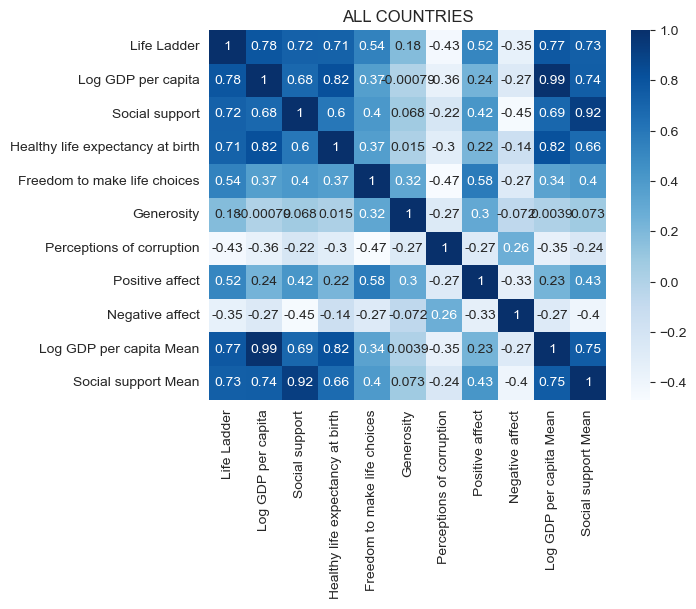

In [18]:
### CORRELATION MATRIX ###

# Correlation
df2_matrix = df2.corr()

# Correlation matrix
sns.heatmap(df2_matrix, cmap = "Blues", annot = True)
plt.title("ALL COUNTRIES")

### Time Series of Happiness Scores Across All Countries

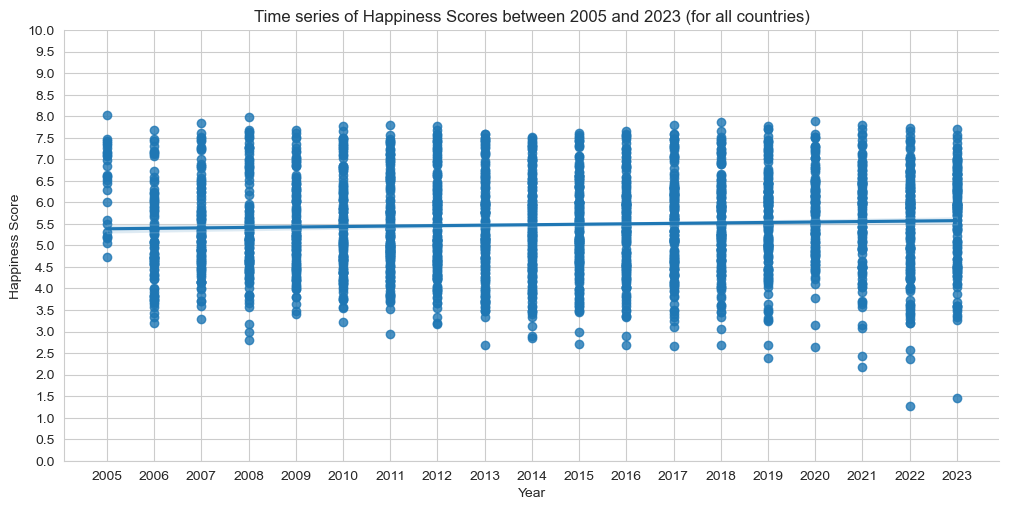

In [19]:
### COMPARING HAPPINESS SCORES THROUGHOUT THE YEARS ###

# Creating the plot
sns.lmplot(df_new, x = "year", y = "Life Ladder", aspect = 2)

# Customising label names
plt.title("Time series of Happiness Scores between 2005 and 2023 (for all countries)")
plt.xlabel("Year")
plt.ylabel("Happiness Score")

# Customising axes
plt.xticks(range(2005, 2024, 1))
plt.yticks(np.arange(0, 10.5, 0.5))

# Show plot
plt.show()

## Happiest & Unhappiest Countries of 2023

In [20]:
### HAPPIEST AND UNHAPPIEST COUNTRIES OF 2023 ###

df23 = df_new[df_new['year'] == 2023 ]

happiest = df23[df23['Life Ladder'] == df23['Life Ladder'].max()]
unhappiest = df23[df23['Life Ladder'] == df23['Life Ladder'].min()]

pd.concat([happiest, unhappiest], ignore_index = True, sort = False)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Log GDP per capita Mean,Social support Mean
0,Finland,2023,7.699,1.222696,1.135698,71.3,0.943,-0.001,0.185,0.717,0.173,1.181945,1.174894
1,Afghanistan,2023,1.446,-1.574877,-3.642083,55.2,0.228,NaN,0.738,0.261,0.460,-1.574877,-2.744839


## Linear Regressions

In [21]:
### LINEAR FUNCTION ###

def lm1(xvar, X_val):
    # Predictor and Output Variables
    lm_x = df_new[[xvar]]
    lm_y = df_new[['Life Ladder']]


    ##  CREATE AND TRAIN MODEL ##
    lm_model = LinearRegression(fit_intercept = True)
    lm_model.fit(lm_x, lm_y)

    lm_y_hat = lm_model.predict(lm_x)


    print ('### STATISTICS ###')

    ## STATISTICS ##
    lm_coeff = lm_model.coef_[0][0]
    lm_intercept = lm_model.intercept_[0]

    print(f"Coefficients: {lm_coeff}", f"Intercept: {lm_intercept}", sep = "\n")

    ## EVALUATE MODEL ##
    mse = round(metrics.mean_squared_error(lm_y, lm_y_hat), 5)
    r2 = round(metrics.r2_score(lm_y, lm_y_hat), 11)
    var = round(lm_y.var(), 5)
    var = var.values[0]

    print (f"MSE: {mse}", f"R-squared: {r2}" , f"Variance: {var}", sep = "\n")

    ### OLS REGRESSION RESULTS (FOR p-VALUE) ###
    ## TAKEN FROM https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression (elplatt, 2015) ##

    lm_x2 = sm.add_constant(lm_x)
    est = sm.OLS(lm_y, lm_x2)
    est2 = est.fit()
    print(est2.summary())


    ## PREDICTION ##
    lm_X = pd.DataFrame({xvar: [X_val]})
    lm_X_val = lm_X[xvar].values[0]

    lm_pred = lm_model.predict(lm_X)
    lm_pred_val = lm_pred[0][0]

    print (f"\n\nPredicted happiness score for {lm_X_val}: {lm_pred_val}")

    print ('\n### PLOT ###')

    ## CREATE PLOT ##
    plt.plot(lm_x, lm_y,'o', alpha = 0.5)
    plt.plot(lm_x, lm_y_hat, 'r', alpha = 0.5)
    plt.plot(lm_X_val, lm_pred_val,'x', color = "purple")
    plt.xlabel(f'{xvar} (standardised)')
    plt.ylabel('Happiness (Life Ladder) Score')
    # plt.xticks(np.arange(x1, x2, xstep), rotation = 45)
    plt.title(f"Relationship between {xvar} and Happiness (Life Ladder) Score")
    plt.show()

### STATISTICS ###
Coefficients: 0.8798786100076599
Intercept: 5.488421200344444
MSE: 0.48717
R-squared: 0.61407242419
Variance: 1.26287
                            OLS Regression Results                            
Dep. Variable:            Life Ladder   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     3741.
Date:                Mon, 30 Dec 2024   Prob (F-statistic):               0.00
Time:                        07:45:00   Log-Likelihood:                -2492.7
No. Observations:                2353   AIC:                             4989.
Df Residuals:                    2351   BIC:                             5001.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.02

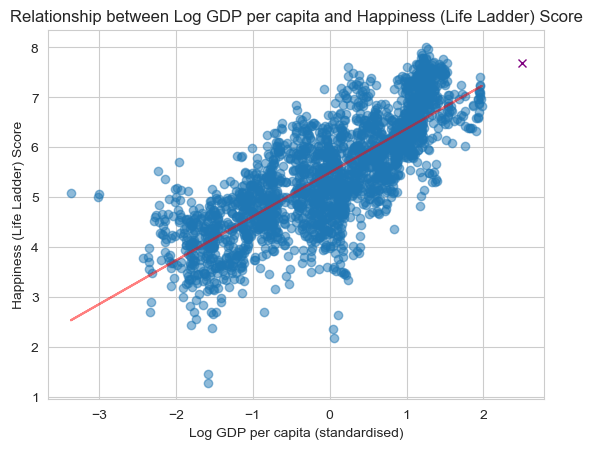

In [22]:
lm1('Log GDP per capita', 2.5)

### STATISTICS ###
Coefficients: 0.8139561533508993
Intercept: 5.484803172253121
MSE: 0.60431
R-squared: 0.52127708094
Variance: 1.26287
                            OLS Regression Results                            
Dep. Variable:            Life Ladder   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     2560.
Date:                Mon, 30 Dec 2024   Prob (F-statistic):               0.00
Time:                        07:45:01   Log-Likelihood:                -2746.2
No. Observations:                2353   AIC:                             5496.
Df Residuals:                    2351   BIC:                             5508.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025   

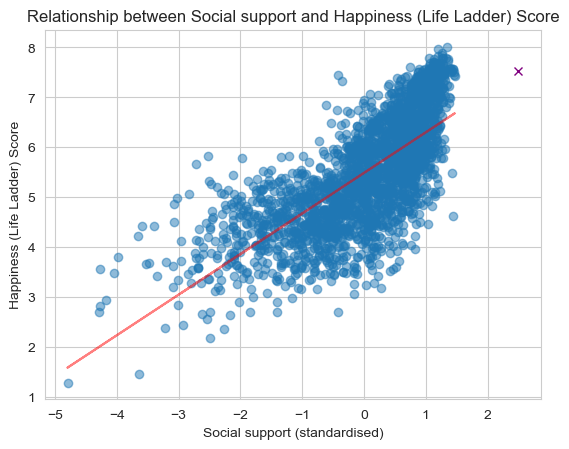

In [23]:
lm1('Social support', 2.5)

## Multiple Regression

In [24]:
def mr_model(xvar1, xvar2):
    mrmodel = LinearRegression(fit_intercept = True)

    mr_x = df_new[[xvar1, xvar2]]
    mr_y = df_new[['Life Ladder']]

    ##  CREATE AND TRAIN MODEL ##
    mrmodel.fit(mr_x, mr_y)
    mr_y_hat = mrmodel.predict(mr_x)


    print ('### STATISTICS ###')

    ## STATISTICS ##
    mr_coeff = mrmodel.coef_[0]
    mr_intercept = round(mrmodel.intercept_[0], 5)

    print(f"Coefficients: {mr_coeff}", f"Intercept: {mr_intercept}", sep="\n")

    ### EVALUATING MODEL ###
    mr_mse = round(metrics.mean_squared_error(mr_y, mr_y_hat), 5)
    mr_r2 = round(metrics.r2_score(mr_y, mr_y_hat), 5)
    mr_var = mr_y.var()
    mr_var_value = round(mr_var.values[0], 5)

    print (f"MSE: {mr_mse}" , f"R^2: {mr_r2}", f"var: {mr_var_value}", sep="\n")

In [25]:
mr_model('Social support', 'Log GDP per capita')

### STATISTICS ###
Coefficients: [0.39502988 0.61137249]
Intercept: 5.48683
MSE: 0.40437
R^2: 0.67967
var: 1.26287
